# Autoencoders

Autoencoders (AE) are a family of neural networks for which the output is the same as the intput. They work by compressing the input into a latent-space representation, and then reconstructing the output from this representation.

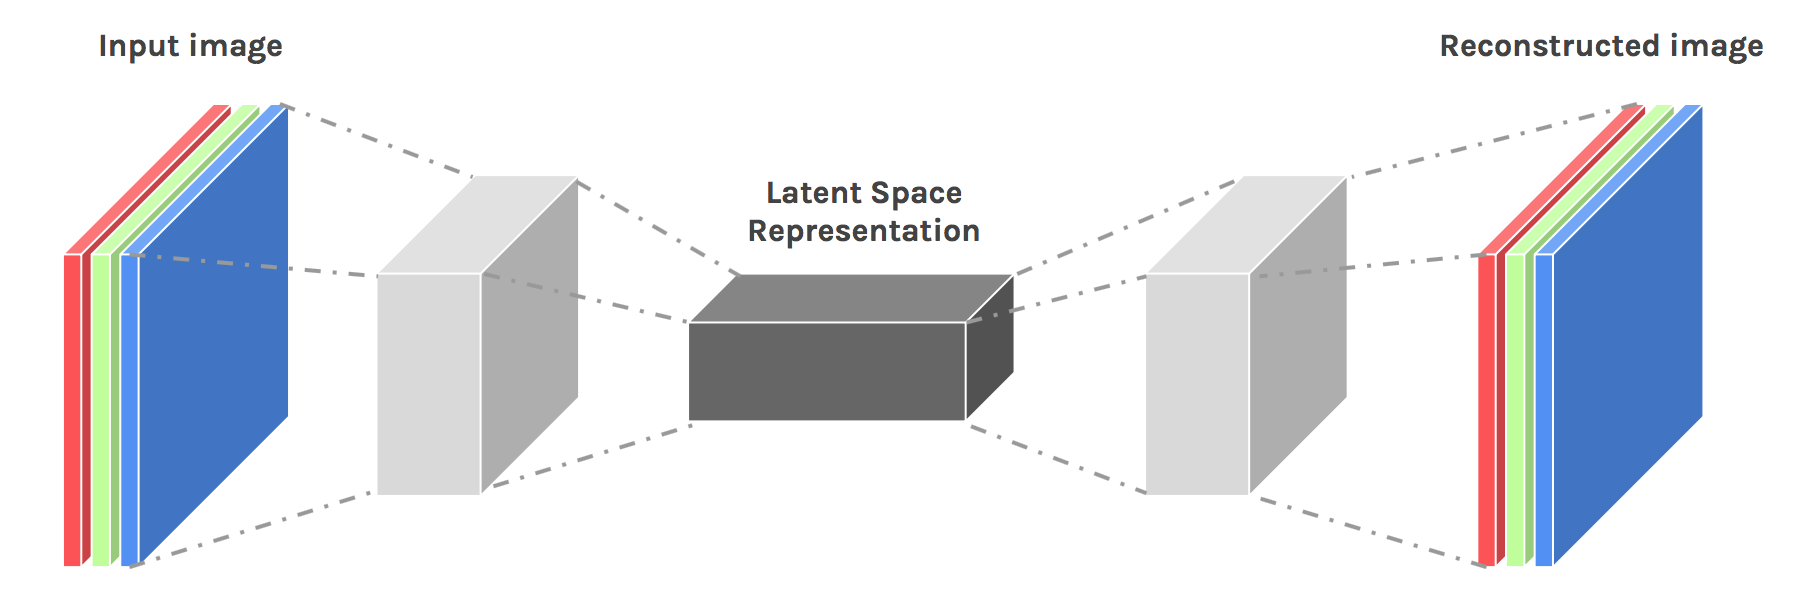

#### Let's build the simplest possible autoencoder

We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 120  # 120 floats -> compression of factor 25.6, assuming the input is 3072 floats

# this is our input placeholder
input_img = Input(shape=(3072,))

# Hidden Layer
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

#Final Layer
# "decoded" is the lossy reconstruction of the input
decoded = Dense(3072, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Let's also create a separate encoder model:


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

As well as the decoder model:

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


Now let's train our autoencoder to reconstruct Cifar10 images.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:



In [4]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

Let's prepare our input data. We're using cifar10 images, and we're discarding the labels (since we're only interested in encoding/decoding the input images).


In [5]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()


We will normalize all values between 0 and 1 and we will flatten the 32x32 images into vectors of size 3072.


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
#Now let's train our autoencoder for 100 epochs:

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=10000,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some pics
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 26s - loss: 0.6953 - val_loss: 0.6943
Epoch 2/100
50000/50000 [==============================] - 27s - loss: 0.6939 - val_loss: 0.6936
Epoch 3/100
50000/50000 [==============================] - 27s - loss: 0.6935 - val_loss: 0.6933
Epoch 4/100
50000/50000 [==============================] - 27s - loss: 0.6933 - val_loss: 0.6932
Epoch 5/100
50000/50000 [==============================] - 27s - loss: 0.6932 - val_loss: 0.6932
Epoch 6/100
50000/50000 [==============================] - 27s - loss: 0.6931 - val_loss: 0.6931
Epoch 7/100
50000/50000 [==============================] - 27s - loss: 0.6931 - val_loss: 0.6931
Epoch 8/100
50000/50000 [==============================] - 26s - loss: 0.6931 - val_loss: 0.6931
Epoch 9/100
50000/50000 [==============================] - 28s - loss: 0.6931 - val_loss: 0.6930
Epoch 10/100
50000/50000 [==============================] - 30s - loss: 0.693

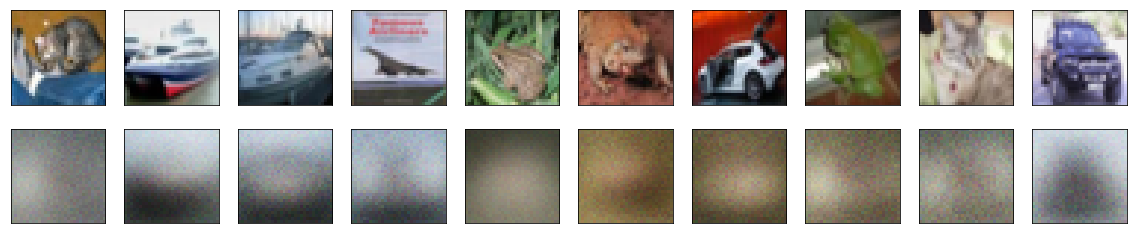

In [39]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Probably by changing the optimizer and reducing the number of training points we could get a better answer.

In [57]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [61]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 120
input_img = Input(shape=(3072,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [62]:
#Now let's train our autoencoder for 100 epochs:

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 4s - loss: 0.7263 - val_loss: 0.6804
Epoch 2/100
10000/10000 [==============================] - 5s - loss: 0.6761 - val_loss: 0.6810
Epoch 3/100
10000/10000 [==============================] - 4s - loss: 0.6716 - val_loss: 0.6724
Epoch 4/100
10000/10000 [==============================] - 5s - loss: 0.6671 - val_loss: 0.6676
Epoch 5/100
10000/10000 [==============================] - 4s - loss: 0.6639 - val_loss: 0.6629
Epoch 6/100
10000/10000 [==============================] - 5s - loss: 0.6600 - val_loss: 0.6590
Epoch 7/100
10000/10000 [==============================] - 4s - loss: 0.6576 - val_loss: 0.6583
Epoch 8/100
10000/10000 [==============================] - 4s - loss: 0.6546 - val_loss: 0.6555
Epoch 9/100
10000/10000 [==============================] - 5s - loss: 0.6531 - val_loss: 0.6524
Epoch 10/100
10000/10000 [==============================] - 4s - loss: 0.6506 - val_los

10000/10000 [==============================] - 5s - loss: 0.6166 - val_loss: 0.6189
Epoch 86/100
10000/10000 [==============================] - 5s - loss: 0.6167 - val_loss: 0.6192
Epoch 87/100
10000/10000 [==============================] - 5s - loss: 0.6179 - val_loss: 0.6216
Epoch 88/100
10000/10000 [==============================] - 5s - loss: 0.6175 - val_loss: 0.6186
Epoch 89/100
10000/10000 [==============================] - 4s - loss: 0.6164 - val_loss: 0.6186
Epoch 90/100
10000/10000 [==============================] - 4s - loss: 0.6159 - val_loss: 0.6180
Epoch 91/100
10000/10000 [==============================] - 5s - loss: 0.6165 - val_loss: 0.6196
Epoch 92/100
10000/10000 [==============================] - 4s - loss: 0.6160 - val_loss: 0.6177
Epoch 93/100
10000/10000 [==============================] - 4s - loss: 0.6156 - val_loss: 0.6181
Epoch 94/100
10000/10000 [==============================] - 5s - loss: 0.6155 - val_loss: 0.6174
Epoch 95/100
10000/10000 [=================

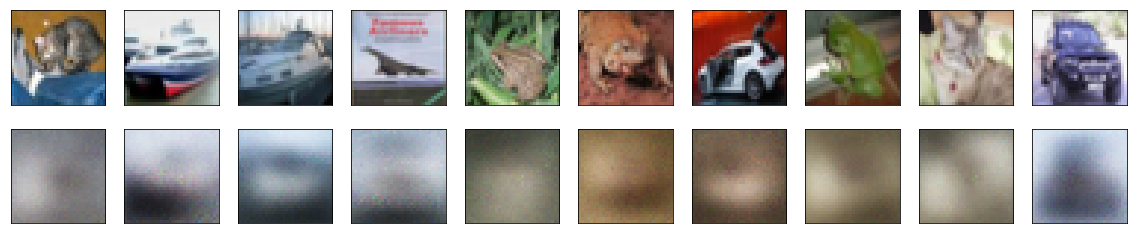

In [63]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

This is better than earlier with a test loss of 0.6179

### Regularized Autoencoders

##### Adding a sparsity constraint on the encoded representations

A sparse autoencoder is simply an autoencoder whose training criterion involves a sparsity penalty Ω(h) on the code layer h, in addition to the reconstruction error:

     L(x, g(f(x))) + Ω(h) 

where g(h) is the decoder output and typically we have h = f (x), the encoder output.

An autoencoder that has been regularized to be sparse must respond to unique statistical features of the dataset it has been trained on, rather than simply acting as an identity function. In this way, training to perform the copying task with a sparsity penalty can yield a model that has learned useful features as a byproduct.

In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [96]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [97]:
from keras import regularizers

encoding_dim = 120

input_img = Input(shape=(3072,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(3072, activation='sigmoid')(encoded)

autoencoder_reg = Model(input_img, decoded)

# create the encoder model
encoder = Model(input_img, encoded)

# create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder_reg.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_reg.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_reg.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 5s - loss: 1.1919 - val_loss: 0.7071
Epoch 2/100
10000/10000 [==============================] - 4s - loss: 0.7046 - val_loss: 0.6996
Epoch 3/100
10000/10000 [==============================] - 4s - loss: 0.6994 - val_loss: 0.6971
Epoch 4/100
10000/10000 [==============================] - 5s - loss: 0.6972 - val_loss: 0.6959
Epoch 5/100
10000/10000 [==============================] - 5s - loss: 0.6960 - val_loss: 0.6951
Epoch 6/100
10000/10000 [==============================] - 4s - loss: 0.6952 - val_loss: 0.6946
Epoch 7/100
10000/10000 [==============================] - 4s - loss: 0.6947 - val_loss: 0.6943
Epoch 8/100
10000/10000 [==============================] - 5s - loss: 0.6943 - val_loss: 0.6940
Epoch 9/100
10000/10000 [==============================] - 4s - loss: 0.6940 - val_loss: 0.6938
Epoch 10/100
10000/10000 [==============================] - 4s - loss: 0.6938 - val_los

10000/10000 [==============================] - 4s - loss: 0.6926 - val_loss: 0.6928
Epoch 86/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 87/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 88/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 89/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 90/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 91/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6928
Epoch 92/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 93/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 94/100
10000/10000 [==============================] - 5s - loss: 0.6926 - val_loss: 0.6927
Epoch 95/100
10000/10000 [=================

Let's train this model for 100 epochs (with the added regularization the model is less likely to overfit and can be trained longer). The models ends with a train loss of 0.69 and test loss of 0.69. The difference between the two is mostly due to the regularization term being added to the loss during training.

Here's a visualization of our new results:

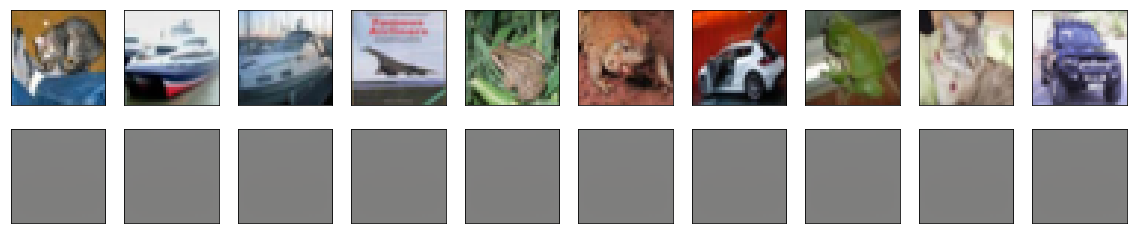

In [98]:
import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

They look pretty similar to the previous model, the only significant difference being the sparsity of the encoded representations. 

### Deep autoencoder

Up until now we were using a single layer of encoder, in this case we will use a stack of layers:

In [25]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train[0:10000]
x_test = x_test[0:5000]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(10000, 3072)
(5000, 3072)


In [26]:
input_img = Input(shape=(3072,))
encoded = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded)
#encoded3 = Dense(250, activation='relu')(encoded2)

#decoded3 = Dense(250, activation='relu')(encoded3)
decoded2 = Dense(500, activation='relu')(encoded2)
decoded = Dense(3072, activation='sigmoid')(decoded2)

Complie it

In [27]:
autoencoder_deep = Model(input_img, decoded)

# create the encoder model
encoder = Model(input_img, encoded2)

# create the decoder model
encoded_input = Input(shape=(500,))
decoder_layer = autoencoder_deep.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_deep.compile(optimizer='adagrad', loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                epochs=100,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 10000 samples, validate on 5000 samples
Epoch 1/100
10000/10000 [==============================] - 12s - loss: 1.2153 - val_loss: 0.6949
Epoch 2/100
10000/10000 [==============================] - 13s - loss: 0.7188 - val_loss: 0.6871
Epoch 3/100
10000/10000 [==============================] - 13s - loss: 0.6870 - val_loss: 0.6834
Epoch 4/100
10000/10000 [==============================] - 12s - loss: 0.6744 - val_loss: 0.6721
Epoch 5/100
10000/10000 [==============================] - 13s - loss: 0.6655 - val_loss: 0.6721
Epoch 6/100
10000/10000 [==============================] - 13s - loss: 0.6668 - val_loss: 0.6588
Epoch 7/100
10000/10000 [==============================] - 12s - loss: 0.6587 - val_loss: 0.6562
Epoch 8/100
10000/10000 [==============================] - 13s - loss: 0.6554 - val_loss: 0.6562
Epoch 9/100
10000/10000 [==============================] - 13s - loss: 0.6553 - val_loss: 0.6526
Epoch 10/100
10000/10000 [==============================] - 13s - loss: 0.6553

In [30]:
encoder = Model(input_img, encoded2)
encoded_input = Input(shape=(500,))
decoder_layer = autoencoder_deep.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
x_test.shape
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs.shape

(5000, 500)

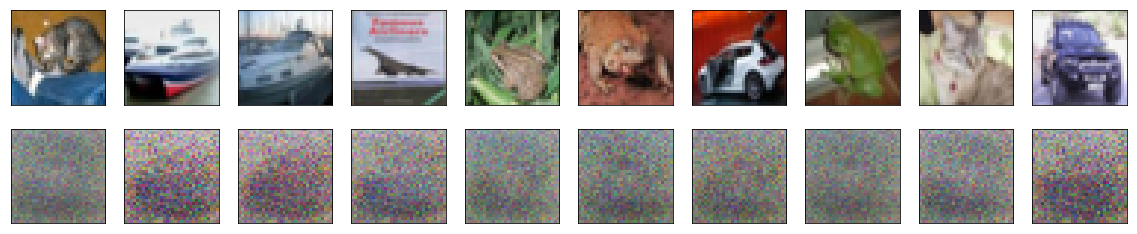

In [32]:

import matplotlib.pyplot as plt

n = 10  # how many pics we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [41]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x2 = MaxPooling2D((2, 2), padding='same')(x1)
x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x2)
x4 = MaxPooling2D((2, 2), padding='same')(x3)
x5 = Conv2D(8, (3, 3), activation='relu', padding='same')(x4)
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x6 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x7 = UpSampling2D((2, 2))(x6)
x8 = Conv2D(8, (3, 3), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2, 2))(x8)
x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
x11 = UpSampling2D((2, 2))(x10)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x11)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adagrad', loss='binary_crossentropy')

In [42]:
from keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format

In [43]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 146s - loss: 0.6234 - val_loss: 0.6081
Epoch 2/50
50000/50000 [==============================] - 134s - loss: 0.6046 - val_loss: 0.6036
Epoch 3/50
50000/50000 [==============================] - 146s - loss: 0.6007 - val_loss: 0.6000
Epoch 4/50
50000/50000 [==============================] - 170s - loss: 0.5982 - val_loss: 0.5974
Epoch 5/50
50000/50000 [==============================] - 152s - loss: 0.5954 - val_loss: 0.5950
Epoch 6/50
50000/50000 [==============================] - 177s - loss: 0.5924 - val_loss: 0.5923
Epoch 7/50
50000/50000 [==============================] - 163s - loss: 0.5910 - val_loss: 0.5921
Epoch 8/50
50000/50000 [==============================] - 153s - loss: 0.5899 - val_loss: 0.5899
Epoch 9/50
50000/50000 [==============================] - 175s - loss: 0.5891 - val_loss: 0.5893
Epoch 10/50
50000/50000 [==============================] - 244s - loss: 0.588

The model converges to a loss of 0.094, significantly better than our previous models (this is in large part due to the higher entropic capacity of the encoded representation, 128 dimensions vs. 32 previously). Let's take a look at the reconstructed digits:

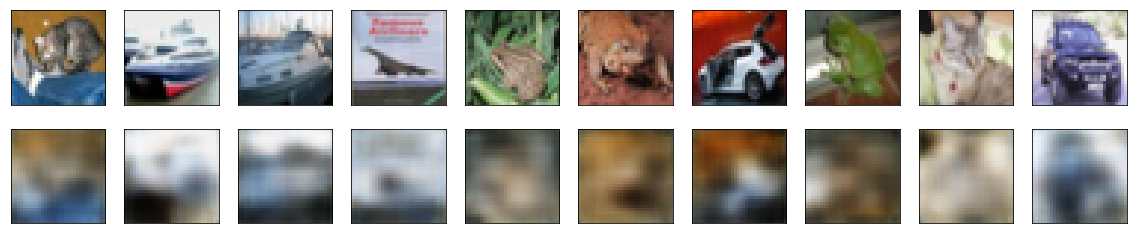

In [46]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

These are the best results so far. I trained this model for 50 epochs. The models ends with a train loss of 0.58 and test loss of 0.58. The lowest so far. This mainly due to convovling instead of using all the neurons in the space (MLP) which tends to loose spatial information.

### Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s - loss: 191.3535 - val_loss: 173.4965
Epoch 2/50
60000/60000 [==============================] - 11s - loss: 172.4896 - val_loss: 168.5965
Epoch 3/50
60000/60000 [==============================] - 10s - loss: 167.9551 - val_loss: 166.9581
Epoch 4/50
60000/60000 [==============================] - 10s - loss: 165.2136 - val_loss: 163.9637
Epoch 5/50
60000/60000 [==============================] - 10s - loss: 163.6485 - val_loss: 164.4892
Epoch 6/50
60000/60000 [==============================] - 12s - loss: 162.7519 - val_loss: 162.1719
Epoch 7/50
60000/60000 [==============================] - 12s - loss: 162.2885 - val_loss: 159.7233
Epoch 8/50
60000/60000 [==============================] - 11s - loss: 162.6636 - val_loss: 162.8566
Epoch 9/50
60000/60000 [==============================] - 10s - loss: 163.6932 - val_loss: 160.3164
Epoch 10/50
60000/60000 [=========================

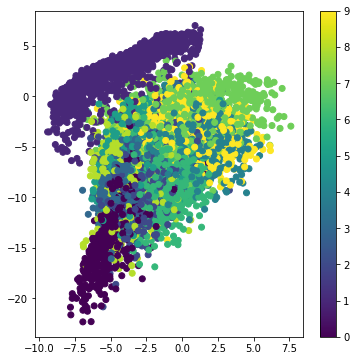

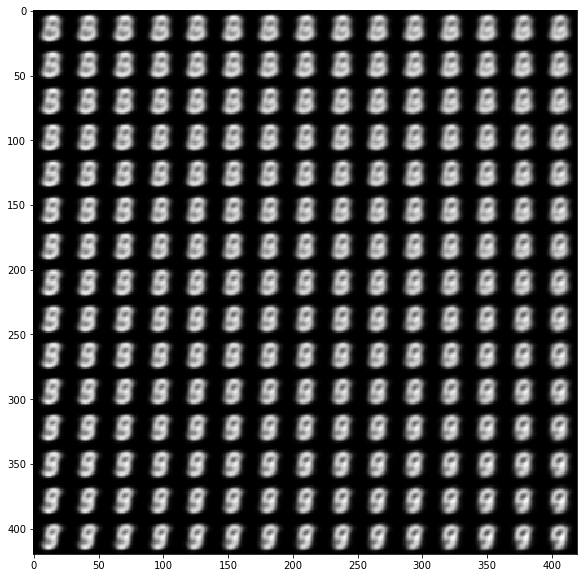

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0


x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


# Custom loss layer
class CustomVariationalLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x, x_decoded_mean):
        xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        x_decoded_mean = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

y = CustomVariationalLayer()([x, x_decoded_mean])
vae = Model(x, y)
vae.compile(optimizer='rmsprop', loss=None)


# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

C:\Users\Tejas\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 88s - loss: 4387.6339 - val_loss: 2372.3179
Epoch 2/50
50000/50000 [==============================] - 87s - loss: 2214.4674 - val_loss: 2168.3740
Epoch 3/50
50000/50000 [==============================] - 93s - loss: 2162.4624 - val_loss: 2154.0449
Epoch 4/50
50000/50000 [==============================] - 103s - loss: 2152.5909 - val_loss: 2228.4463
Epoch 5/50
50000/50000 [==============================] - 98s - loss: 2243.6484 - val_loss: 2159.5327
Epoch 6/50
50000/50000 [==============================] - 104s - loss: 2187.5843 - val_loss: 2214.8181
Epoch 7/50
50000/50000 [==============================] - 96s - loss: 2391.4801 - val_loss: 2228.1816
Epoch 8/50
50000/50000 [==============================] - 89s - loss: 2167.4573 - val_loss: 2129.5562
Epoch 9/50
50000/50000 [==============================] - 86s - loss: 2153.2795 - val_loss: 2265.5027
Epoch 10/50
50000/50000 [=====

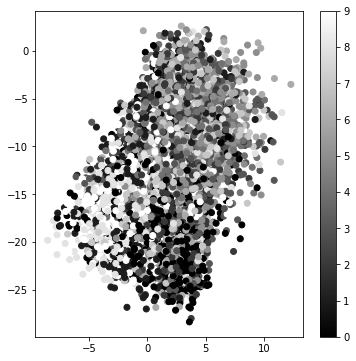

ValueError: cannot reshape array of size 3072 into shape (32,32)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import cifar10

batch_size = 10000
original_dim = 3072
latent_dim = 2
intermediate_dim = 1536
epochs = 50
epsilon_std = 1.0


x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


# Custom loss layer
class CustomVariationalLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x, x_decoded_mean):
        xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        x_decoded_mean = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

y = CustomVariationalLayer()([x, x_decoded_mean])
vae = Model(x, y)
vae.compile(optimizer='rmsprop', loss=None)

# train the VAE on cifar10 digits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))



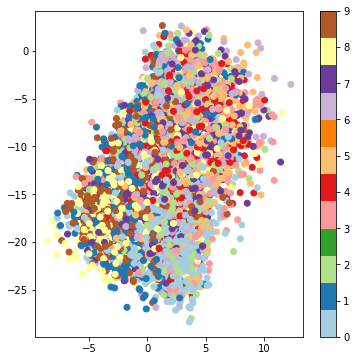

In [99]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the cifar10 classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap = 'Paired')
plt.colorbar() 
plt.show()

In [103]:
x_decoded.shape

(1, 3072)

[3]
[8]
[8]
[0]
[6]
[6]
[1]
[6]
[3]
[1]


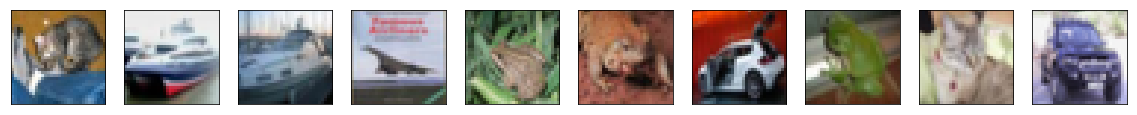

In [100]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    print(y_test_1[i])
    # display reconstruction
    #ax = plt.subplot(2, n, i + n + 1)
    #plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show()

In [74]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean) 

In [87]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 32
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

In [ ]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size,3)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_decoded[i].reshape(digit_size, digit_size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #print(y_test_1[i])
    # display reconstruction
    #ax = plt.subplot(2, n, i + n + 1)
    #plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show()

In [83]:
x_decoded.shape

(1, 3072)

In [93]:
xi

-1.6448536269514729

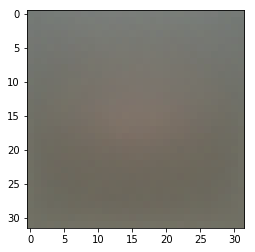

In [106]:
ax = plt.subplot(111)
plt.imshow(x_decoded.reshape(32, 32, 3))
plt.gray()
plt.show()
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

In [107]:
for i, yi in enumerate(grid_x):
    print(yi)

-1.64485362695
-1.20404696003
-0.920822976368
-0.697141434846
-0.503965367211
-0.328072107532
-0.161844166804
-1.39145821234e-16
0.161844166804
0.328072107532
0.503965367211
0.697141434846
0.920822976368
1.20404696003
1.64485362695


In [108]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])

In [110]:
z_sample.shape

(1, 2)